In [21]:
import simpful as sf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['class'] = pd.Series(data.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [23]:
renames = {name: name.replace(' (cm)', '').replace(' ', '_') for name in iris.columns}
renames['class'] = 'cls'
iris = iris.rename(columns=renames)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,cls
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
petal_length = ctrl.Antecedent(np.linspace(1.0, 7.0, 11), 'petal_length')
petal_width = ctrl.Antecedent(np.linspace(0.0, 2.5, 11), 'petal_width')
petal_length.automf(names="short medium long".split())
petal_width.automf(names="narrow medium wide".split())

/home/dave/anaconda3/envs/eff/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


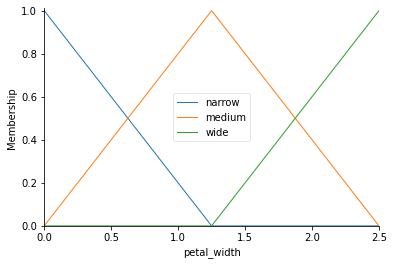

In [25]:
petal_width.view()

In [26]:
# Creating a consequent variable for each iris type, with a single membership term 'likely'

setosa = ctrl.Consequent(np.linspace(0, 1, 10), 'setosa', "som")
setosa['likely'] = fuzz.trimf(setosa.universe, (0., 1., 1.))

versicolor = ctrl.Consequent(np.linspace(0, 1, 10), 'versicolor', "som")
versicolor['likely'] = fuzz.trimf(versicolor.universe, (0., 1., 1.))

verginica = ctrl.Consequent(np.linspace(0, 1, 10), 'verginica', "som")
verginica['likely'] = fuzz.trimf(verginica.universe, (0., 1., 1.))


In [27]:
# create rules

rule1 = ctrl.Rule(petal_width['narrow'] & petal_length['short'], setosa['likely'])
rule2 = ctrl.Rule(petal_width['medium'] & petal_length['medium'], versicolor['likely'])
rule3 = ctrl.Rule(petal_width['wide'] & petal_length['long'], verginica['likely'])

In [28]:
iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
iris_classifier = ctrl.ControlSystemSimulation(iris_ctrl)

In [29]:
%%time
predicted = []
for (petal_length, petal_width) in zip (iris.petal_length, iris.petal_width):
    iris_classifier.inputs({'petal_length': petal_length, 'petal_width': petal_width})
    iris_classifier.compute()
    predicted.append(np.argmax([iris_classifier.output['setosa'], iris_classifier.output['versicolor'], iris_classifier.output['verginica']]))

CPU times: user 99.2 ms, sys: 308 µs, total: 99.5 ms
Wall time: 98.2 ms


In [30]:
predicted

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1]